### Objective

A Comparison between Statistical Classification Models' ability to learn and identify Human vs. Robot based on movement patterns and trajectory.

### The Data

Annotated dataset for multi-camera tracking and 2D/3D object detection.

- **Data Source:**  
  [NVIDIA PhysicalAI SmartSpaces Dataset (Hugging Face)](https://huggingface.co/datasets/nvidia/PhysicalAI-SmartSpaces)

- **Data Description:**  
  - Consists of videos from indoor scenes (warehouses, hospitals, retail spaces).
  - Time-synchronized to track humans and robots across multiple cameras.
  - For this project, we use the **calibration** and **ground truth annotation** files from a 5-minute simulation.
  - Each frame captures:
    - Bounding boxes of each object in each camera view.
    - Pixel area (feature) and Euclidean distance from the origin (target).
  - The training dataset contains **14 different warehouses**, each with:
    - A varying number of cameras.
    - A varying number of moving units (Humans/Robots).

### Predictors and Response
The dataset's starting point is the tracked movement of a unit within the space as captured by the sensors. 
The data processing invloves collecting statistics about the unit's movement.

- Input Features: 
  First and second order statistics of a unit's movement and trajectory within the physical space as captured by the SmarSpace sensors, including:
  * minimal distance from origin (center of map).
  * Maximal distance from origin.
  * Range of the trajectory.
  * Total distance traveled.
  * Proportion of the sensors capturing the movement; hinting at the unit's position relative to overall area coverage.

- Target Variable: 
  **Human vs. Robot**

### Models
  - Logistic Regression
  - Discriminant Analysis
  - Support Vector Machine
  - Random Forest
  - Gradient Booster

### Performance Metrics
All models are compared and benchmarked against each other on the following metrics:
  - **Balanced Accuracy** - Measuring overall correctness.

  - **True Positive Rate (Sensitivity/Recall)** - Measuring the ability to detect the positives (Robots).
  - **True Negative Rate (Specificity)** - Measuring the ability to detect the negatives (Humans).
  - **Positive Predictive Value (Precision)** - Measuring how many predicted positives are true.
  - **Negative Predictive Value** - Measuring how many predicted negatives are true.
  - **F1 Score** - Measuring a balance between precision and recall.
  - **Area Under the ROC Curve (AUC)** - Measuring a threshold-independent model performance.

In [ ]:
# Data Fetching
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------------------
csv_path = r".\all_units_statistics.csv"  # adjust CSV path
# ---------------------------------------------------------------

df = pd.read_csv(csv_path)
df['UNIT_TYPE'] = df['UNIT_TYPE'].str.replace('Forklift','Robot')\
                                            .replace('NovaCarter','Robot')\
                                            .replace('Transporter','Robot')\
                                            .replace('AgilityDigit','Robot')\
                                            .replace('FourierGR1T2','Robot')

relevant_columns = [# 'MIN_LOC_X',                        
                    # 'MIN_LOC_Y',                        
                    'MIN_DIST_ORIGIN',                  
                    # 'MAX_LOC_X',                        
                    # 'MAX_LOC_Y',                        
                    'MAX_DIST_ORIGIN',                  
                    # 'MEAN_LOC_X',                       
                    # 'MEAN_LOC_Y',                       
                    # 'MEAN_DIST_ORIGIN',                 
                    # 'STD_LOC_X',                        
                    # 'STD_LOC_Y',                        
                    # 'STD_DIST_ORIGIN',                  
                    # 'MEDIAN_LOC_X',                     
                    # 'MEDIAN_LOC_Y',                     
                    # 'MEDIAN_DIST_ORIGIN',               
                    # 'RANGE_LOC_X',                      
                    # 'RANGE_LOC_Y',                      
                    'RANGE_DIST_ORIGIN',                
                    # 'TOTAL_DIST_TRAVELED_X',            
                    # 'TOTAL_DIST_TRAVELED_Y',            
                    'TOTAL_DIST_TRAVELED_EUCLIDEAN',    
                    # 'TOTAL_DIRECTION_CHANGES',          
                    # 'TIME_SPENT_WALKING_SEC',           
                    # 'TIME_SPENT_STANDING_SEC',          
                    'RATIO_OF_CAMERA_CAPTURES',         
                    # 'UNIT_ID',                                              
                    # 'WAREHOUSE', 
                    'UNIT_TYPE']

df = df[relevant_columns]
print('DataFrame Head:')
display(df.head(10))
print(f'DataFrame Shape: {df.shape}')
print(f'DataFrame description:')
display(df.describe())
print('Missing values count:')
display(df.isna().sum())
print('Targets value counts:')
display(df.UNIT_TYPE.value_counts()) # This is the binary target


DataFrame Head:


,MIN_DIST_ORIGIN,MAX_DIST_ORIGIN,RANGE_DIST_ORIGIN,TOTAL_DIST_TRAVELED_EUCLIDEAN,RATIO_OF_CAMERA_CAPTURES,UNIT_TYPE
0,11.106066,11.106066,0.000000,0.000000,0.254902,Robot
1,1.994927,17.000587,15.005660,22.746647,0.333333,Robot
2,8.997928,26.505044,17.507115,37.900809,0.549020,Robot
3,3.992113,22.516111,18.523998,29.917656,0.627451,Robot
4,10.990368,29.000149,18.009781,57.446402,0.627451,Robot
5,9.993152,23.944812,13.951659,26.113041,0.431373,Robot
6,26.164422,26.164422,0.000000,0.000000,0.254902,Robot
7,29.041871,29.041871,0.000000,0.000000,0.215686,Robot
8,4.989540,29.005357,24.015817,74.337811,0.470588,Person
9,3.990781,30.005201,26.014420,94.853471,0.784314,Person


DataFrame Shape: (863, 6)
DataFrame description:


,MIN_DIST_ORIGIN,MAX_DIST_ORIGIN,RANGE_DIST_ORIGIN,TOTAL_DIST_TRAVELED_EUCLIDEAN,RATIO_OF_CAMERA_CAPTURES
count,863.000000,863.000000,863.000000,863.000000,863.000000
mean,5.138398,19.926258,14.787861,41.028220,0.657735
std,5.466314,7.219069,6.136994,23.397515,0.182105
min,0.659399,4.468607,0.000000,0.000000,0.083333
25%,1.934409,15.040746,11.017951,24.862673,0.510870
50%,2.982931,18.001240,15.002743,36.855573,0.666667
75%,6.980117,26.004322,17.064258,53.882791,0.804348
max,29.041871,38.853437,37.035031,141.908247,1.000000


Missing values count:


MIN_DIST_ORIGIN                  0
MAX_DIST_ORIGIN                  0
RANGE_DIST_ORIGIN                0
TOTAL_DIST_TRAVELED_EUCLIDEAN    0
RATIO_OF_CAMERA_CAPTURES         0
UNIT_TYPE                        0
dtype: int64

Targets value counts:


UNIT_TYPE
Person    800
Robot      63
Name: count, dtype: int64

In [4]:
# Stratified Train Test Split + Performance Tuning Params
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------

random_state = 42
train_test_split_ratio = 0.2

# ------------------------------------------------------------------

X = df.drop(columns=['UNIT_TYPE'])
y = (df['UNIT_TYPE'] == 'Robot').astype(int)  # Binary target: Robot=1, Person=0

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=train_test_split_ratio, 
                                                    stratify=y, random_state=random_state)

df = df.iloc[X_train.shape[0]*[True] + X_test.shape[0]*[False]].reset_index(drop=True)

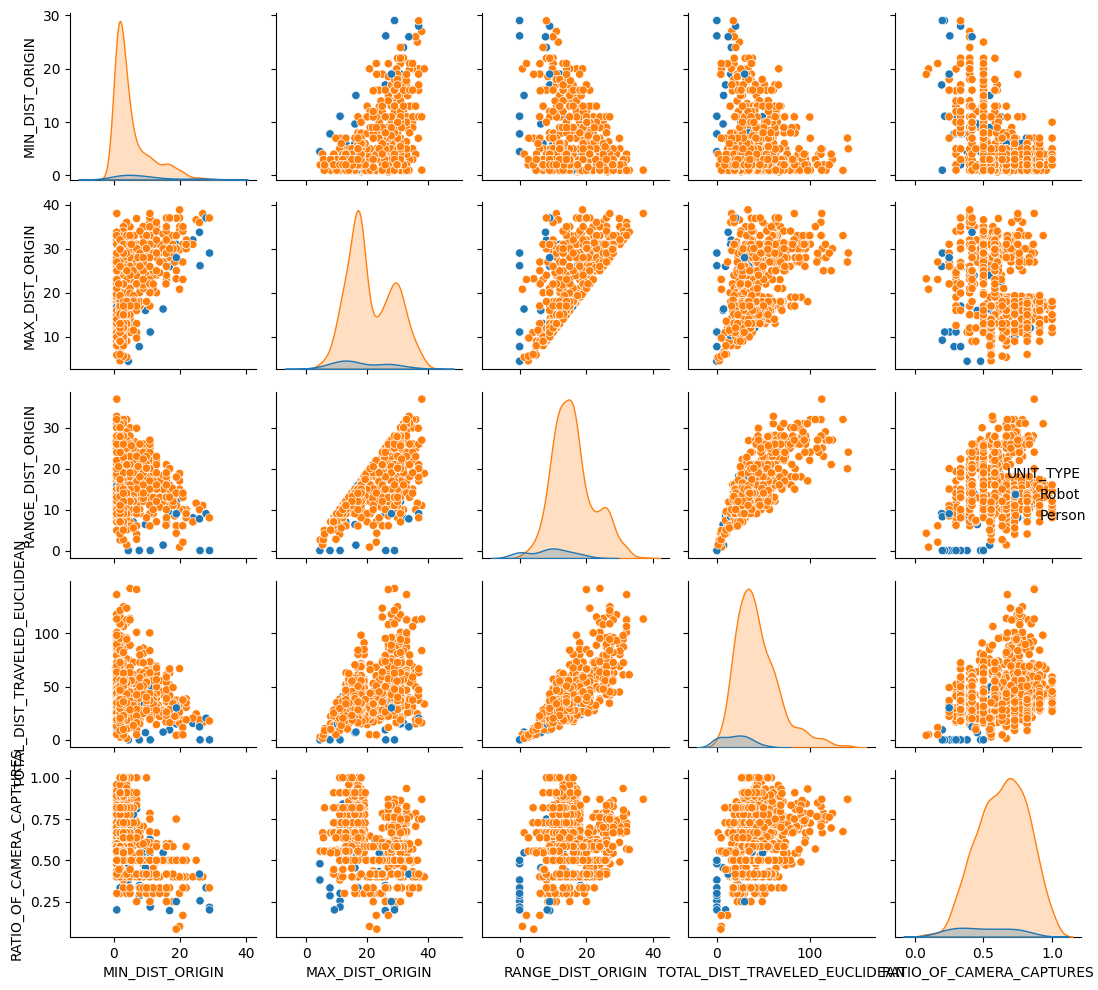

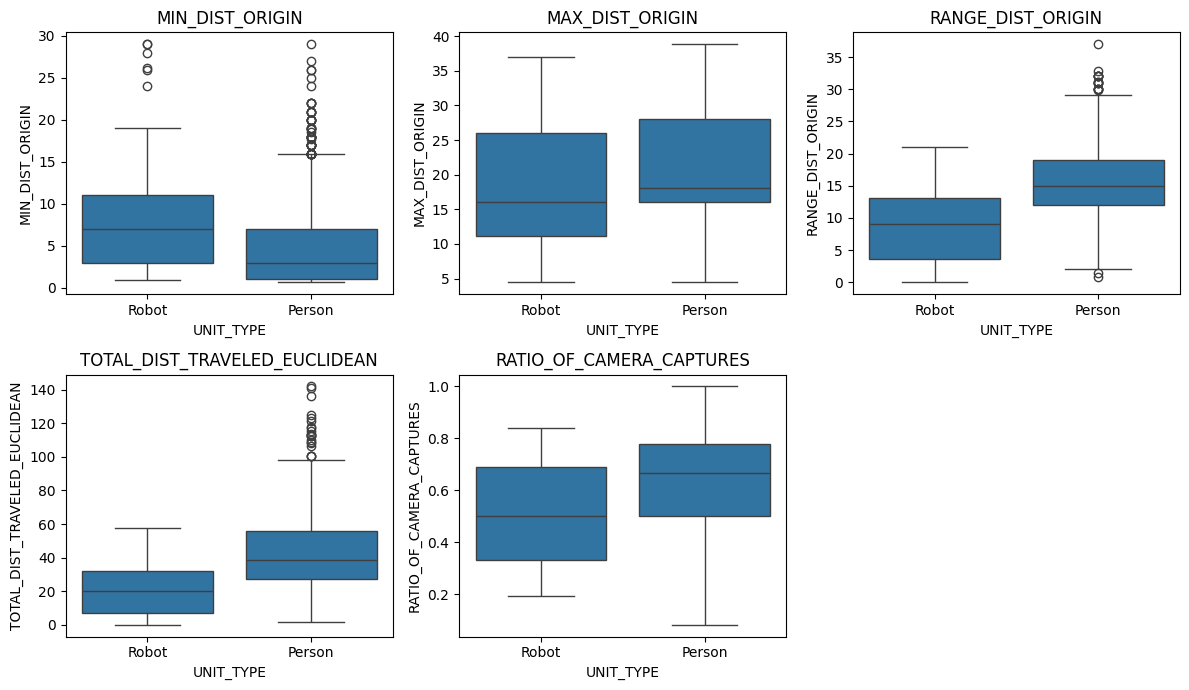

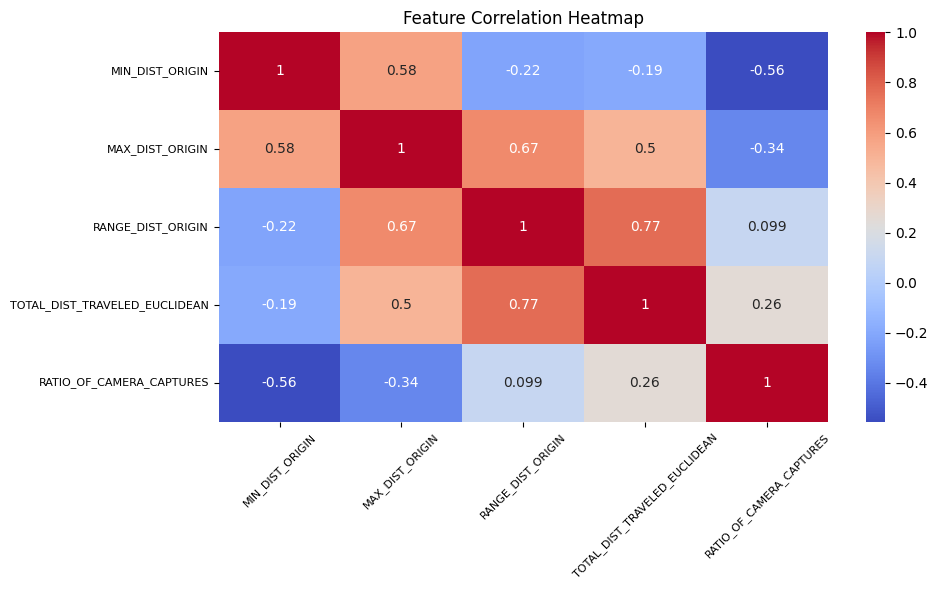

In [5]:
# Data vizualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="UNIT_TYPE", diag_kind="kde", height=2, aspect=1)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flatten()
numeric_columns = [col for col in df.columns if col != 'UNIT_TYPE']

for i, col in enumerate(numeric_columns):
    sns.boxplot(x='UNIT_TYPE', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

features = df[[col for col in relevant_columns if 'UNIT_TYPE' not in col]]
labels = df['UNIT_TYPE']
label_names = np.unique(labels)
label_to_int = {name: i for i, name in enumerate(label_names)}
int_labels = np.array([label_to_int[label] for label in labels])

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(features, columns=features.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, fontsize=8) 
plt.yticks(fontsize=8)      
plt.tight_layout()
plt.show()


### Classification Metrics used
- **TP (True Positive)**: Correctly predicted positive cases  
- **TN (True Negative)**: Correctly predicted negative cases  
- **FP (False Positive)**: Incorrectly predicted positive cases (Type I error)  
- **FN (False Negative)**: Incorrectly predicted negative cases (Type II error)

| Metric                        | Formula                                                               |
|------------------------------|----------------------------------------------------------------------------------------|
| **Balanced Accuracy**        | $(\text{Sensitivity} + \text{Specificity}) / 2$                                       |
| **Sensitivity (Recall, TPR)**| $TP / (TP + FN)$                                                                      |
| **Specificity (TNR)**        | $TN / (TN + FP)$                                                                      |
| **Precision (PPV)**          | $TP / (TP + FP)$                                                                      |
| **Negative Predictive Value (NPV)** | $TN / (TN + FN)$                                                              |
| **F1 Score**                 | $2 \cdot \frac{\text{Precision} \cdot \text{Sensitivity}}{\text{Precision} + \text{Sensitivity}}$ |
| **AUC**                      | Measures the model’s ability to distinguish between classes across all classification thresholds.                |


### Logistic Regression

Logistic regression models the probability of a binary outcome $ Y \in \{0, 1\} $ as a function of predictors $ X \in \mathbb{R}^p $.

The model:

$$
\log\left(\frac{\mathbb{P}(Y=1 \mid X)}{\mathbb{P}(Y=0 \mid X)}\right) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

- The left-hand side is the **logit**.
- Estimation is done via **maximum likelihood**.
- Output is a probability of class.

The model assumes:
- Assumes linearity in the log-odds.
- No multicollinearity between predictors.
- Independent observations.

The **Box-Tidwell Test** checks the linearity of continuous predictors with the log-odds in logistic regression model.

For each predictor $x$, the test adds a term $x \cdot log(x)$ to the model:

$$
log (\frac{p}{1-p}) = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x\cdot log(x)
$$

$\Rightarrow$ if $\beta_2$ is not statistically significant, the relationship between log-odds and $x$ is likely linear.

c:\dev\Statistical Learning\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


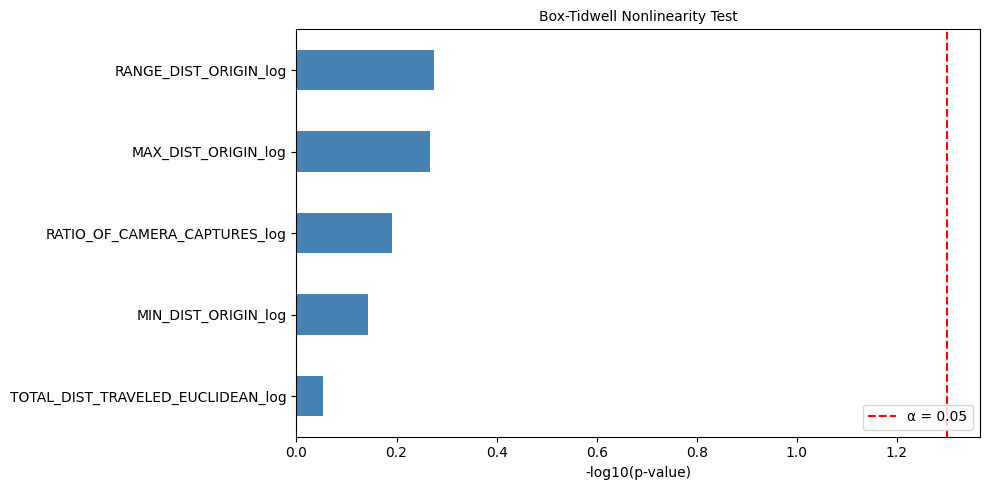

In [6]:
# A Log Odds linearity Check
import statsmodels.api as sm

y = (df['UNIT_TYPE'] == 'Robot').astype(int)
X = df.drop(columns=['UNIT_TYPE'])

# Removing non-positive values to avoid log(0) and log(negative)
X = X[(X > 0).all(axis=1)]
y = y.loc[X.index]

# Box-Tidwell transformed terms
for col in X.columns:
    X[f'{col}_log'] = X[col] * np.log(X[col])

# intercept
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit(disp=0) 

# p-values of interaction terms
pvals = model.pvalues
box_tidwell_pvals = pvals[pvals.index.str.endswith('_log')]

# Plot
minus_log_p = -np.log10(box_tidwell_pvals)
plt.figure(figsize=(10, 5))
minus_log_p.sort_values().plot(kind='barh', color='steelblue')
plt.axvline(-np.log10(0.05), color='red', linestyle='--', label='α = 0.05')
plt.xlabel('-log10(p-value)')
plt.title('Box-Tidwell Nonlinearity Test', fontsize=10)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

* None of the bars in the $-log_{10}(\beta_2 \ p-value)$ plot pass the red $α = 0.05$ threshold line; All p-values are greater than $0.05$.
* Fail to reject the null hypothesis; No evidence of nonlinearity for any feature.

$\Rightarrow$ The Logistic Regression assumption holds for the non-correlated features.

In [8]:
# Classification Utility functions

from sklearn.metrics import roc_curve
from sklearn.metrics import (balanced_accuracy_score, recall_score, 
                             precision_score, f1_score,
                             roc_auc_score, confusion_matrix)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def npv_score(y_true, y_pred):
    tn, _, fn, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn) if (tn + fn) > 0 else 0

def auc_score(y_true, y_proba):
    return roc_auc_score(y_true, y_proba)

def bootstrap_metric(y_true, y_input, metric_func, n_bootstrap=1000, alpha=0.05, seed=0):
    np.random.seed(seed)
    stats = []
    n = len(y_true)
    for _ in range(n_bootstrap):
        idx = np.random.choice(n, size=n, replace=True)
        stats.append(metric_func(y_true[idx], y_input[idx]))
    lower = np.percentile(stats, 100 * (alpha / 2))
    upper = np.percentile(stats, 100 * (1 - alpha / 2))
    return (lower, upper)

def evaluate_model_at_threshold(model, X_test, y_test, threshold=0.5, bootstrap=False, n_bootstrap=1000):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    results = {
        "threshold": threshold,
        "accuracy": balanced_accuracy_score(y_test, y_pred),
        "sensitivity": recall_score(y_test, y_pred),  # TPR
        "specificity": float(tn / (tn + fp) if (tn + fp) > 0 else 0),  # TNR
        "ppv": precision_score(y_test, y_pred),  # PPV
        "npv": float(tn / (tn + fn) if (tn + fn) > 0 else 0),
        "f1": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_proba)
    }

    if bootstrap:
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        y_proba_np = np.array(y_proba)
        results["ci"] = {
            "accuracy": bootstrap_metric(y_test_np, y_pred_np, balanced_accuracy_score, n_bootstrap),
            "sensitivity": bootstrap_metric(y_test_np, y_pred_np, recall_score, n_bootstrap),
            "specificity": bootstrap_metric(y_test_np, y_pred_np, specificity_score, n_bootstrap),
            "ppv": bootstrap_metric(y_test_np, y_pred_np, precision_score, n_bootstrap),
            "npv": bootstrap_metric(y_test_np, y_pred_np, npv_score, n_bootstrap),
            "f1": bootstrap_metric(y_test_np, y_pred_np, f1_score, n_bootstrap),
            "auc": bootstrap_metric(y_test_np, y_proba_np, auc_score, n_bootstrap)
        }

    return results

def find_best_threshold(model, X_test, y_test, metric='auc', thresholds=np.linspace(0, 1, 101), bootstrap=False, n_bootstrap=100):
    
    best_result = None
    best_score = float('inf')
    target_value=0.9

    for t in thresholds:
        result = evaluate_model_at_threshold(model, X_test, y_test, threshold=t,
                                             bootstrap=bootstrap, n_bootstrap=n_bootstrap)
        score = result[metric]
        
        diff = abs(score - target_value)
        if diff < best_score:
            best_score = diff
            best_result = result

    return best_result

def print_metrics(metrics_dict):
    print('=' * 30)
    print(f"Best threshold: {metrics_dict['threshold']:.2f}")
    print('=' * 30)

    def format_ci(name):
        if "ci" in metrics_dict and name in metrics_dict["ci"] and metrics_dict["ci"][name] is not None:
            ci_low, ci_high = metrics_dict["ci"][name]
            return f" [{ci_low:.3f}, {ci_high:.3f}]"
        return ""

    print(f"Accuracy   : {metrics_dict['accuracy']:.3f}{format_ci('accuracy')}")
    print(f"Sensitivity: {metrics_dict['sensitivity']:.3f} (TPR){format_ci('sensitivity')}")
    print(f"Specificity: {metrics_dict['specificity']:.3f} (TNR){format_ci('specificity')}")
    print(f"Precision  : {metrics_dict['ppv']:.3f} (PPV){format_ci('ppv')}")
    print(f"NPV        : {metrics_dict['npv']:.3f}{format_ci('npv')}")
    print(f"F1 Score   : {metrics_dict['f1']:.3f}{format_ci('f1')}")
    print(f"AUC        : {metrics_dict['auc']:.3f}{format_ci('auc')}")
    print('=' * 30)

def plot_confusion_mat(model, X_test, y_test, threshold=0.5, labels=None, title="Confusion Matrix"):
    """
    Plots confusion matrix for predictions at a given threshold.
    """
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{title} (threshold={threshold:.2f})")
    plt.tight_layout()
    plt.show()

def plot_auc(y_true, y_pred_proba):
    
    """Interactive ROC graph"""

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    accuracies = []
    f1_scores = []
    for thresh in thresholds:
        y_pred = (y_pred_proba >= thresh).astype(int)
        accuracies.append(balanced_accuracy_score(y_true, y_pred))
        f1_scores.append(f1_score(y_true, y_pred))
    hover_text = [
        f"Threshold: {thresh:.2f}<br>Accuracy: {acc:.3f}<br>F1: {f1:.3f}"
        for thresh, acc, f1 in zip(thresholds, accuracies, f1_scores)
    ]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=fpr, y=tpr,
        mode='lines+markers',
        text=hover_text,
        hoverinfo='text',
        name='ROC Curve'
    ))
    fig.update_layout(
        title='ROC Curve',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        template='plotly_white',
        width = 800,
        height = 500
    )
    return fig

Logistic Regression Best parameters: {'C': 10, 'penalty': 'l2'}
Best threshold: 0.39
Accuracy   : 0.796 [0.668, 0.870]
Sensitivity: 0.923 (TPR) [0.656, 1.000]
Specificity: 0.669 (TNR) [0.591, 0.742]
Precision  : 0.185 (PPV) [0.088, 0.297]
NPV        : 0.991 [0.968, 1.000]
F1 Score   : 0.308 [0.158, 0.458]
AUC        : 0.831 [0.650, 0.937]


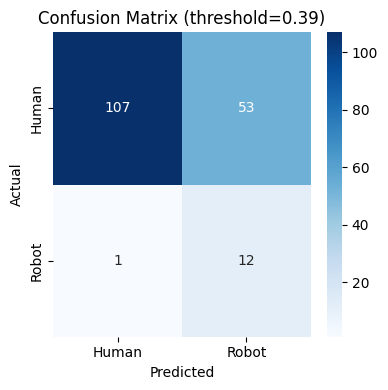

In [9]:
# Fitting a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# ----------------------------------------- Model Parameters  -----------------------------------------

auto_best_threshold_based_on_metric = 'accuracy'      # Available metrics: ["accuracy", "sensitivity", "specificity", "ppv", "npv", "f1", "auc"]
include_bootstrap_confidence_intervals = True        # True # False
cross_validation_splits = 5                           # 5-Fold cross validation
grid_search_scoring_metric = 'roc_auc'                 # choosing best metric in grid search : ['roc_auc','recall']

# ----------------------------------------------------------------------------------------------------

logreg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits=cross_validation_splits, shuffle=True, random_state=random_state)
grid = GridSearchCV(logreg, param_grid, cv=cv, scoring=grid_search_scoring_metric, n_jobs=-1)
grid.fit(X_train, y_train)

print("Logistic Regression Best parameters:", grid.best_params_)
# Test set evaluation
best_model = grid.best_estimator_
y_test_proba = best_model.predict_proba(X_test)[:, 1]

best_metrics_logreg = find_best_threshold(
    model=best_model,
    X_test=X_test,
    y_test=y_test,
    metric=auto_best_threshold_based_on_metric,             
    bootstrap=include_bootstrap_confidence_intervals,    # to get CI    
    n_bootstrap=100         
)

print_metrics(metrics_dict=best_metrics_logreg)

y_pred = best_model.predict(X_test)

plot_confusion_mat(best_model, 
                   X_test, y_test, 
                   threshold=best_metrics_logreg['threshold'], 
                   labels=["Human", "Robot"])

fig = plot_auc(y_test, y_test_proba)
fig.show()

# #------------------------ Choosing a different threshold ------------------------

# threshold_to_display = 0.5 

# threshold_dict = evaluate_model_at_threshold(best_model, 
#                             X_test, y_test, 
#                             threshold=threshold_to_display, 
#                             bootstrap=include_bootstrap_confidence_intervals, 
#                             n_bootstrap=100)

# print_metrics(metrics_dict=threshold_dict)

# plot_confusion_mat(best_model, 
#                    X_test, y_test, 
#                    threshold=threshold_dict['threshold'], 
#                    labels=["Human", "Robot"])

# #--------------------------------------------------------------------------------


### Support Vector Machine (SVM) Classifier

Support Vector Machines aim to find a hyperplane that maximally separates classes in the feature space. The separation is done by maximizing the margin between the classes, defined by the closest points (support vectors).

#### Linear SVM

Given labeled data $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i \in \mathbb{R}^n$ and $y_i \in \{-1, +1\}$, SVM solves:

$$
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
$$
$$
\text{subject to } \ y_i(\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Where:
- $\mathbf{w}$: weight vector (normal to the hyperplane)
- $b$: bias term
- $xi_i$: slack variables for misclassification
- $C > 0$: regularization parameter


##### Nonlinear SVM

To handle nonlinear boundaries, SVM maps data into a higher-dimensional space via a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^\top \phi(\mathbf{x}_j)
$$

Kernels:
- Linear: $K(\mathbf{x}, \mathbf{z}) = \mathbf{x}^\top \mathbf{z}$
- RBF: $K(\mathbf{x}, \mathbf{z}) = \exp(-\gamma \|\mathbf{x} - \mathbf{z}\|^2)$
- Polynomial: $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^\top \mathbf{z} + r)^d$


The model:

- Has no distributional assumptions.
- Assumes classes are separable with margin.
- Is sensitive to feature scaling.


SVM best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}
Best threshold: 0.07
Accuracy   : 0.757 [0.650, 0.864]
Sensitivity: 0.846 (TPR) [0.606, 1.000]
Specificity: 0.669 (TNR) [0.603, 0.732]
Precision  : 0.172 (PPV) [0.090, 0.279]
NPV        : 0.982 [0.955, 1.000]
F1 Score   : 0.286 [0.157, 0.432]
AUC        : 0.738 [0.576, 0.852]


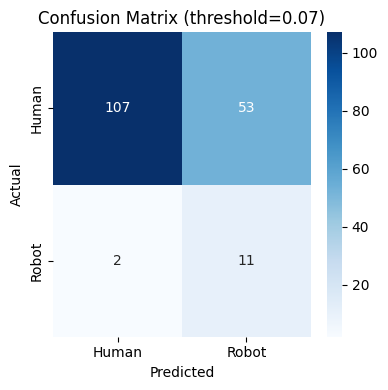

In [10]:
# SVM Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# ----------------------------------------- Model Parameters  -----------------------------------------

auto_best_threshold_based_on_metric = 'f1'      # Available metrics: ["accuracy", "sensitivity", "specificity", "ppv", "npv", "f1", "auc"]
include_bootstrap_confidence_intervals = True        # True # False
cross_validation_splits = 5                           # 5-Fold cross validation
grid_search_scoring_metric = 'recall'                 # choosing best metric in grid search : ['roc_auc','recall']

# ----------------------------------------------------------------------------------------------------

# scaling + SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, kernel='rbf', class_weight='balanced', random_state=42))
])

# SVM hyperparameter grid
svm_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

cv = StratifiedKFold(n_splits=cross_validation_splits, shuffle=True, random_state=random_state)
svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=cv, scoring=grid_search_scoring_metric, n_jobs=-1) 
svm_grid.fit(X_train, y_train)

print("SVM best parameters:", svm_grid.best_params_)

# Test set evaluation
svm_best = svm_grid.best_estimator_
y_test_proba_svm = svm_best.predict_proba(X_test)[:, 1]

best_metrics_svm = find_best_threshold(
    model=svm_best,
    X_test=X_test,
    y_test=y_test,
    metric=auto_best_threshold_based_on_metric,             
    bootstrap=include_bootstrap_confidence_intervals,    # to get CI    
    n_bootstrap=100        
)

print_metrics(metrics_dict=best_metrics_svm)

plot_confusion_mat(svm_best, 
                   X_test, y_test, 
                   threshold=best_metrics_svm['threshold'], 
                   labels=["Human", "Robot"])

fig = plot_auc(y_test, y_test_proba_svm)
fig.show()

# ------------------------ Choosing a different threshold ------------------------

# threshold_to_display = 0.5 

# threshold_dict = evaluate_model_at_threshold(svm_best, 
#                             X_test, y_test, 
#                             threshold=threshold_to_display, 
#                             bootstrap=include_bootstrap_confidence_intervals, 
#                             n_bootstrap=100)

# print_metrics(metrics_dict=threshold_dict)

# plot_confusion_mat(svm_best, 
#                    X_test, y_test, 
#                    threshold=threshold_dict['threshold'], 
#                    labels=["Human", "Robot"])

# --------------------------------------------------------------------------------

### Decision Tree

A Decision Tree partitions the feature space into axis-aligned regions using recursive binary splits, aiming to maximize class purity.

#### Model Definition

Given data $(\mathbf{x}_i, y_i)$, a tree is built by selecting splits that maximize an impurity reduction criterion.

The impurity measure is the Gini impurity: $G = \sum_{k=1}^K p_k(1 - p_k)$  

Where $p_k$ is the proportion of class $k$ in a node.

#### Properties

- Interpretable and non-parametric.
- Handles both numerical and categorical data.
- Prone to overfitting without pruning.
- No need for feature scaling.

### Random Forest

Random Forest is an ensemble method that constructs multiple decision trees and combines their outputs via majority voting.

#### Model Definition

Given labeled data $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i \in \mathbb{R}^n$ and $y_i \in \{1, \dots, K\}$, the Random Forest predicts class $\hat{y}$ by:

$$
\hat{y} = \arg\max_{k \in \{1,\dots,K\}} \sum_{t=1}^T \mathbb{I}(h_t(\mathbf{x}) = k)
$$

Where:
- $h_t$: prediction of the $t$-th tree
- $T$: total number of trees

#### Properties

- Trained on bootstrap samples (with replacement).
- Splits use random feature subsets.
- No need for feature scaling.
- Captures nonlinearity and feature interactions.
- Reduces variance via averaging.

Random Forest best parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best threshold: 0.29
Accuracy   : 0.840 [0.705, 0.906]
Sensitivity: 0.923 (TPR) [0.656, 1.000]
Specificity: 0.756 (TNR) [0.684, 0.814]
Precision  : 0.235 (PPV) [0.110, 0.371]
NPV        : 0.992 [0.972, 1.000]
F1 Score   : 0.375 [0.192, 0.538]
AUC        : 0.867 [0.691, 0.953]


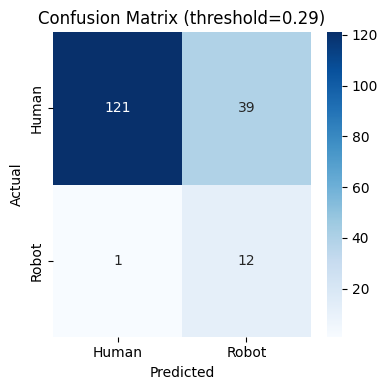

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# ----------------------------------------- Model Parameters  -----------------------------------------

auto_best_threshold_based_on_metric = 'accuracy'         # Available metrics: ["accuracy", "sensitivity", "specificity", "ppv", "npv", "f1", "auc"]
include_bootstrap_confidence_intervals = True           # True # False
cross_validation_splits = 5                              # 5-Fold cross validation
grid_search_scoring_metric = 'recall'                    # choosing best metric in grid search : ['roc_auc','recall']

# ----------------------------------------------------------------------------------------------------

rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=random_state, class_weight='balanced'))
])

# Random Forest hyperparameter grid
rf_param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

cv = StratifiedKFold(n_splits=cross_validation_splits, shuffle=True, random_state=random_state)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=cv, scoring=grid_search_scoring_metric, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Random Forest best parameters:", rf_grid.best_params_)

# Evaluate RF on test set
rf_best = rf_grid.best_estimator_
y_test_proba_rf = rf_best.predict_proba(X_test)[:, 1]

best_metrics_rf = find_best_threshold(
    model=rf_best,
    X_test=X_test,
    y_test=y_test,
    metric=auto_best_threshold_based_on_metric,             
    bootstrap=include_bootstrap_confidence_intervals,    # to get CI    
    n_bootstrap=100        
)

print_metrics(metrics_dict=best_metrics_rf)

plot_confusion_mat(rf_best, 
                   X_test, y_test, 
                   threshold=best_metrics_rf['threshold'], 
                   labels=["Human", "Robot"])

fig = plot_auc(y_test, y_test_proba_rf)
fig.show()

# #------------------------ Choosing a different threshold ------------------------

# threshold_to_display = 0.3 

# threshold_dict = evaluate_model_at_threshold(rf_best, 
#                             X_test, y_test, 
#                             threshold=threshold_to_display, 
#                             bootstrap=include_bootstrap_confidence_intervals, 
#                             n_bootstrap=100)

# print_metrics(metrics_dict=threshold_dict)

# plot_confusion_mat(rf_best, 
#                    X_test, y_test, 
#                    threshold=threshold_dict['threshold'], 
#                    labels=["Human", "Robot"])

# #--------------------------------------------------------------------------------

### Gradient Boosting Machine

Gradient Boosting builds an additive model by sequentially fitting decision trees to correct the errors of prior models using gradient descent on a loss function.

#### Model Definition

Given data $(\mathbf{x}_i, y_i)$, the prediction is:

$$
F_M(\mathbf{x}) = \sum_{m=1}^M \gamma_m h_m(\mathbf{x})
$$

Where:
- $h_m(\mathbf{x})$: the $m$-th weak learner (decision tree).
- $\gamma_m$: step size
- $M$: number of boosting rounds

Each $h_m$ is fit to the negative gradient of the loss function $\ell$:

$$
r_i^{(m)} = -\left[\frac{\partial \ell(y_i, F(\mathbf{x}_i))}{\partial F(\mathbf{x}_i)}\right]_{F = F_{m-1}}
$$

Gradient Boosting best parameters: {'gb__learning_rate': 0.01, 'gb__max_depth': 2, 'gb__n_estimators': 50}
Best threshold: 0.52
Accuracy   : 0.778 [0.622, 0.903]
Sensitivity: 0.769 (TPR) [0.444, 1.000]
Specificity: 0.787 (TNR) [0.731, 0.850]
Precision  : 0.227 (PPV) [0.090, 0.360]
NPV        : 0.977 [0.953, 1.000]
F1 Score   : 0.351 [0.151, 0.491]
AUC        : 0.816 [0.631, 0.934]


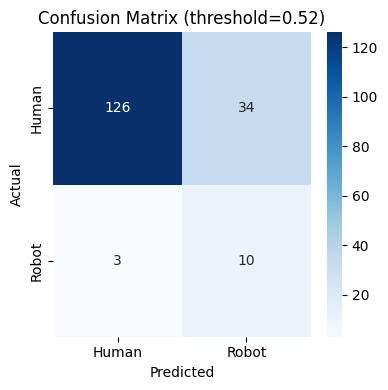

In [12]:
# BGM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# ----------------------------------------- Model Parameters  -----------------------------------------

auto_best_threshold_based_on_metric = 'accuracy'       # Available metrics: ["accuracy", "sensitivity", "specificity", "ppv", "npv", "f1", "auc"]
include_bootstrap_confidence_intervals = True          # True # False
cross_validation_splits = 5                            # 5-Fold cross validation
grid_search_scoring_metric = 'recall'                 # choosing best metric in grid search : ['roc_auc','recall']

# ----------------------------------------------------------------------------------------------------

gb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Gradient Boosting hyperparameter grid
gb_param_grid = {
    'gb__n_estimators': [50, 100, 200, 300, 400, 500],
    'gb__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'gb__max_depth': [2, 3, 5, 7]
}

sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)
cv = StratifiedKFold(n_splits=cross_validation_splits, shuffle=True, random_state=random_state)
gb_grid = GridSearchCV(gb_pipe, gb_param_grid, cv=cv, scoring=grid_search_scoring_metric, n_jobs=-1)
gb_grid.fit(X_train, y_train, gb__sample_weight=sample_weight)

print("Gradient Boosting best parameters:", gb_grid.best_params_)

# Evaluate GB on test set
gb_best = gb_grid.best_estimator_
y_test_proba_gb = gb_best.predict_proba(X_test)[:, 1]


best_metrics_gb = find_best_threshold(
    model=gb_best,
    X_test=X_test,
    y_test=y_test,
    metric=auto_best_threshold_based_on_metric,             
    bootstrap=include_bootstrap_confidence_intervals,    # to get CI    
    n_bootstrap=100        
)

print_metrics(metrics_dict=best_metrics_gb)

plot_confusion_mat(gb_best, 
                   X_test, y_test, 
                   threshold=best_metrics_gb['threshold'], 
                   labels=["Human", "Robot"])

fig = plot_auc(y_test, y_test_proba_gb)
fig.show()

# ------------------------ Choosing a different threshold ------------------------

# threshold_to_display = 0.5 

# threshold_dict = evaluate_model_at_threshold(gb_best, 
#                             X_test, y_test, 
#                             threshold=threshold_to_display, 
#                             bootstrap=include_bootstrap_confidence_intervals, 
#                             n_bootstrap=100)

# print_metrics(metrics_dict=threshold_dict)

# plot_confusion_mat(gb_best, 
#                    X_test, y_test, 
#                    threshold=threshold_dict['threshold'], 
#                    labels=["Human", "Robot"])

# --------------------------------------------------------------------------------

### k-Nearest Neighbors (KNN)

k-NN is a non-parametric, instance-based learning algorithm that predicts the output of a query point based on the outputs of its *k* nearest neighbors in the training set.

#### Model Definition

Given a query point $\mathbf{x}$ and a training set $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$, the prediction $\hat{y}$ is:

- **For regression**:
$$
\hat{y} = \frac{1}{k} \sum_{i \in \mathcal{N}_k(\mathbf{x})} y_i
$$

- **For classification**:
$$
\hat{y} = \text{mode}\left(\{y_i \mid i \in \mathcal{N}_k(\mathbf{x})\}\right)
$$

Where:
- $\mathcal{N}_k(\mathbf{x})$: indices of the $k$ nearest neighbors to $\mathbf{x}$.

No explicit training is performed; computation occurs at prediction time.


KNN best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best threshold: 0.14
Accuracy   : 0.684 [0.558, 0.790]
Sensitivity: 0.462 (TPR) [0.201, 0.667]
Specificity: 0.906 (TNR) [0.857, 0.944]
Precision  : 0.286 (PPV) [0.114, 0.471]
NPV        : 0.954 [0.920, 0.980]
F1 Score   : 0.353 [0.148, 0.514]
AUC        : 0.711 [0.565, 0.845]


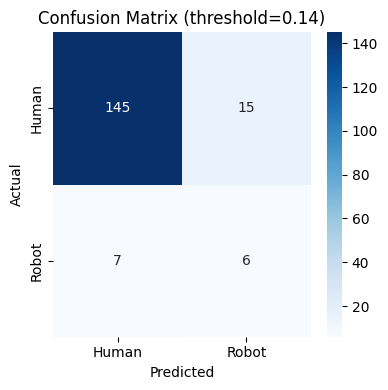

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# ----------------------------------------- Model Parameters  -----------------------------------------

auto_best_threshold_based_on_metric = 'accuracy'      # Available metrics: ["accuracy", "sensitivity", "specificity", "ppv", "npv", "f1", "auc"]
include_bootstrap_confidence_intervals = True        # True # False
cross_validation_splits = 5                           # 5-Fold cross validation
grid_search_scoring_metric = 'roc_auc'                 # choosing best metric in grid search : ['roc_auc','recall']

# ----------------------------------------------------------------------------------------------------

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# KNN hyperparameter grid
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

cv = StratifiedKFold(n_splits=cross_validation_splits, shuffle=True, random_state=random_state)
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=cv, scoring=grid_search_scoring_metric, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("KNN best parameters:", knn_grid.best_params_)

# Evaluate KNN on test set
knn_best = knn_grid.best_estimator_
y_test_proba_knn = knn_best.predict_proba(X_test)[:, 1]

best_metrics_knn = find_best_threshold(
    model=knn_best,
    X_test=X_test,
    y_test=y_test,
    metric=auto_best_threshold_based_on_metric,
    bootstrap=include_bootstrap_confidence_intervals,
    n_bootstrap=100
)

print_metrics(metrics_dict=best_metrics_knn)

plot_confusion_mat(knn_best,
                   X_test, y_test,
                   threshold=best_metrics_knn['threshold'],
                   labels=["Human", "Robot"])

fig = plot_auc(y_test, y_test_proba_knn)
fig.show()

# ------------------------ Choosing a different threshold ------------------------

# threshold_to_display = 0.08

# threshold_dict = evaluate_model_at_threshold(knn_best, 
#                             X_test, y_test, 
#                             threshold=threshold_to_display, 
#                             bootstrap=include_bootstrap_confidence_intervals, 
#                             n_bootstrap=100)

# print_metrics(metrics_dict=threshold_dict)

# plot_confusion_mat(knn_best, 
#                    X_test, y_test, 
#                    threshold=threshold_dict['threshold'], 
#                    labels=["Human", "Robot"])

# --------------------------------------------------------------------------------

In [14]:
# Comparison between the models

def radar_metrics_multi(metrics_dicts, model_names):
    metrics_to_plot = ['accuracy', 'sensitivity', 'specificity', 'ppv', 'npv', 'auc', 'f1']
    categories = metrics_to_plot + [metrics_to_plot[0]]
    fig = go.Figure()
    for metrics, name in zip(metrics_dicts, model_names):
        values = [metrics[m] for m in metrics_to_plot]
        values += [values[0]]
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            name=name,
            line=dict(width=3),
            opacity=1
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 1])
        ),
        showlegend=True,
        title='Performance Metrics Comparison',
        width=700,
        height=500
    )

    return fig

fig_radar = radar_metrics_multi(
    [best_metrics_logreg, best_metrics_svm, best_metrics_rf, best_metrics_gb, best_metrics_knn],
    ["Logistic Regression", "SVM", "Random Forest", "GBM", "KNN"])
fig_radar.show()


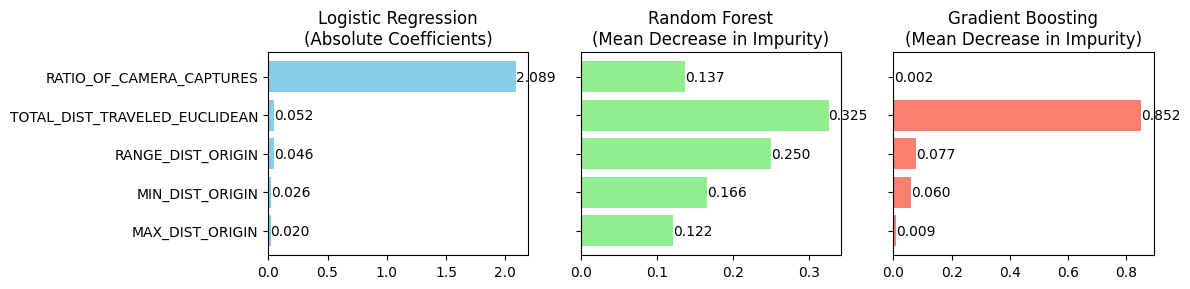

In [15]:
# Feature Importance

import matplotlib.pyplot as plt
import numpy as np

features = X_train.columns
logreg_vals = abs(best_model.coef_[0])
rf_vals = rf_best.named_steps['rf'].feature_importances_
gb_vals = gb_best.named_steps['gb'].feature_importances_

def sort_features(features, importances):
    sorted_idx = np.argsort(importances)[::-1]
    return np.array(features)[sorted_idx], np.array(importances)[sorted_idx]

logreg_features, logreg_vals = sort_features(features, logreg_vals)
rf_features, rf_vals = sort_features(features, rf_vals)
gb_features, gb_vals = sort_features(features, gb_vals)

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

bars0 = axes[0].barh(logreg_features, logreg_vals, color='skyblue')
axes[0].set_title("Logistic Regression\n(Absolute Coefficients)")
axes[0].invert_yaxis()
axes[0].bar_label(bars0, fmt='%.3f')

bars1 = axes[1].barh(rf_features, rf_vals, color='lightgreen')
axes[1].set_title("Random Forest\n(Mean Decrease in Impurity)")
axes[1].bar_label(bars1, fmt='%.3f')

bars2 = axes[2].barh(gb_features, gb_vals, color='salmon')
axes[2].set_title("Gradient Boosting\n(Mean Decrease in Impurity)")
axes[2].bar_label(bars2, fmt='%.3f')

plt.tight_layout()
plt.show()
